In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Importing the mall dataset
dataset= pd.read_csv("Mall_customers.csv")

In [9]:
dataset.shape

(200, 5)

In [10]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#Select the annual income and the spending score columns  
X=dataset.iloc[:, [3, 4]].values

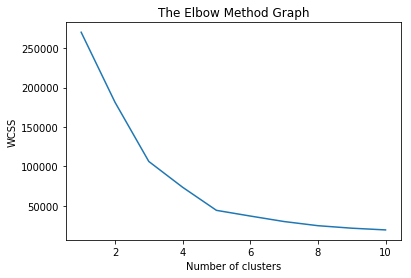

In [7]:
# Using the elbow method to find out the optimal number of clusters. 
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )

     kmeans.fit(X)

     wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

According to the Elbow graph we deterrmine the clusters number as 5. 

Applying k-means algorithm to the X dataset. 

In [10]:
kmeans = KMeans(n_clusters=5, init ='k-means++',max_iter=300,n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(X)

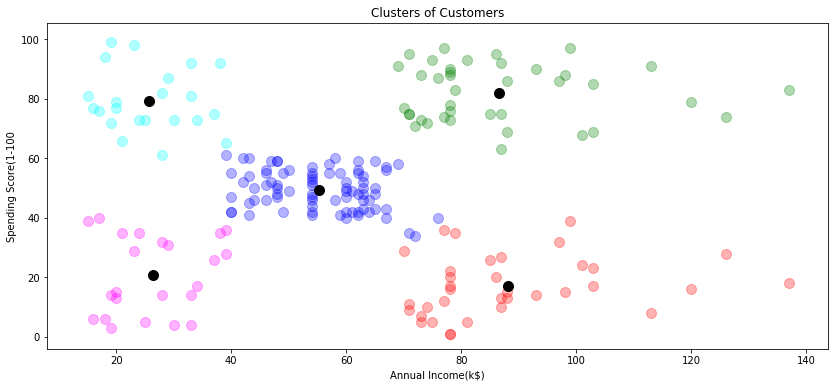

In [27]:
# Visualising the clusters
plt.figure(figsize=(14, 6))

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1', alpha=.3)
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2', alpha=.3)
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3', alpha=.3)
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4', alpha=.3)
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5', alpha=.3)

#Plot the centroid. 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='k', label ='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100');

## Hierarchical clustering

Using the dendrogram to find the optimal numbers of clusters. 


In [16]:
import scipy.cluster.hierarchy as sch

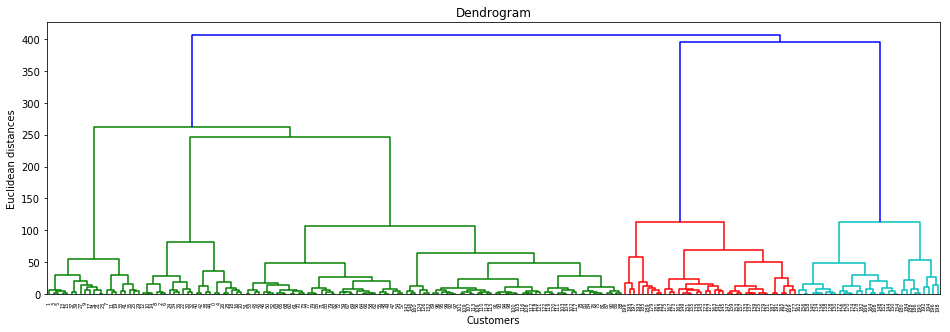

In [20]:
plt.figure(figsize=(16, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances');

## Fitting hierarchical clustering to the Mall_Customes dataset

There are two algorithms for hierarchical clustering: 
- Agglomerative Hierarchical Clustering and 
- Divisive Hierarchical Clustering. 

We choose Euclidean distance and ward method 

In [21]:
from sklearn.cluster import AgglomerativeClustering 

In [22]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [23]:
y_hc=hc.fit_predict(X)

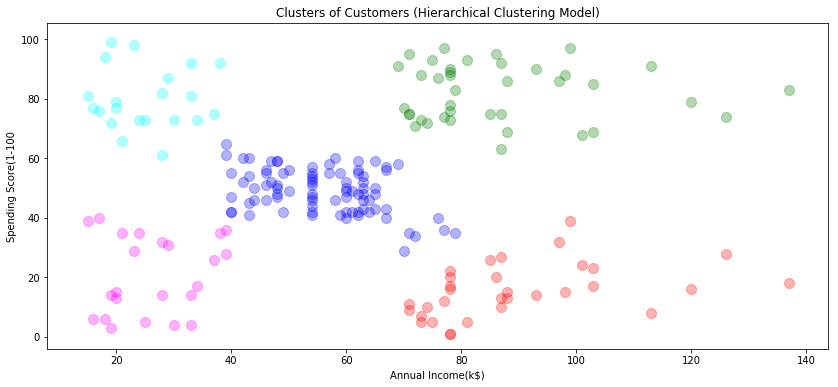

In [30]:
#5 Visualizing the clusters. 
plt.figure(figsize=(14, 6))

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1', alpha=.3)
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2', alpha=.3)
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3', alpha=.3)
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4', alpha=.3)
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5', alpha=.3)

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100');

## Selecting the number of clusters with silhouette analysis on KMeans clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters. 

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. 

This measure has a range of [-1, 1].

- Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. 

- A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

sklearn.metrics.silhouette_score(X, 
                                     labels, 
                                     metric=’euclidean’, 
                                     sample_size=None, 
                                     random_state=None, **kwds)
                                     
Compute the __mean Silhouette Coefficient__ of all samples.

The Silhouette Coefficient is calculated using 

- (a) the mean intra-cluster distance   
- (b) the mean nearest-cluster distance for each sample. 

The Silhouette Coefficient for a sample is 

$$ \Large \frac{(b - a)}{max(a, b)} $$. 

To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

> This function returns the __mean__ Silhouette Coefficient over all samples. 

To obtain the values for each sample, use __silhouette_samples__.

The best value is 1 and the worst value is -1. 

Values near 0 indicate overlapping clusters. 

Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

   
#### Mean Silhouette score: 
Mean score can be simply calculated by taking the mean of silhouette score of all the examples in the data set. This gives us one value representing the Silhouette score of the entire cluster.




In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

In [38]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 9 The average silhouette_score is : 0.45872989167156364
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869


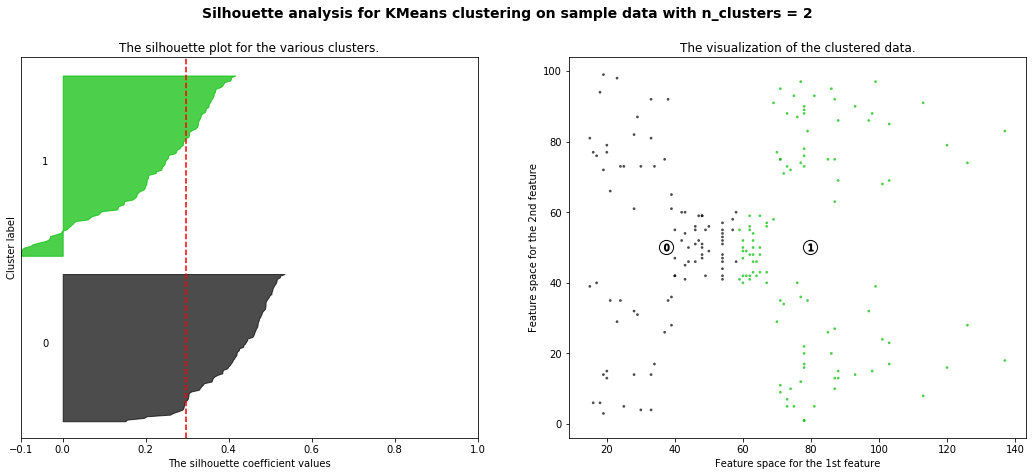

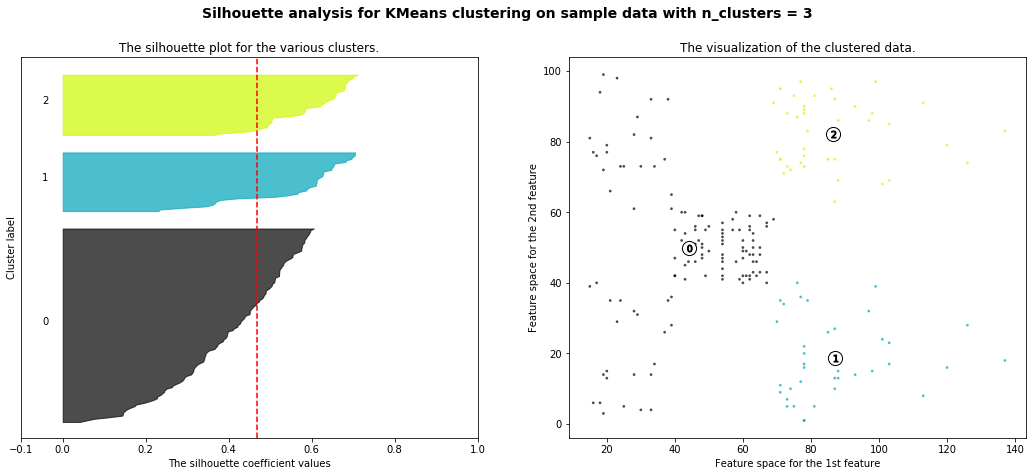

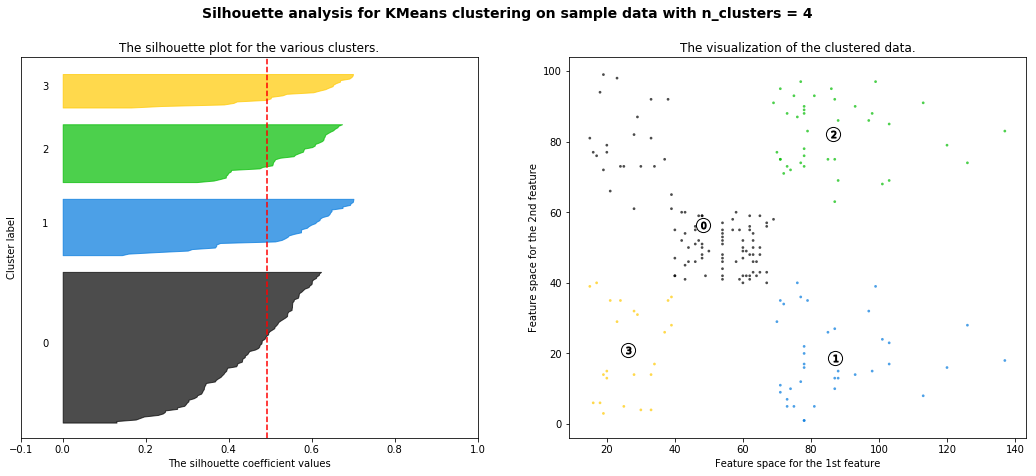

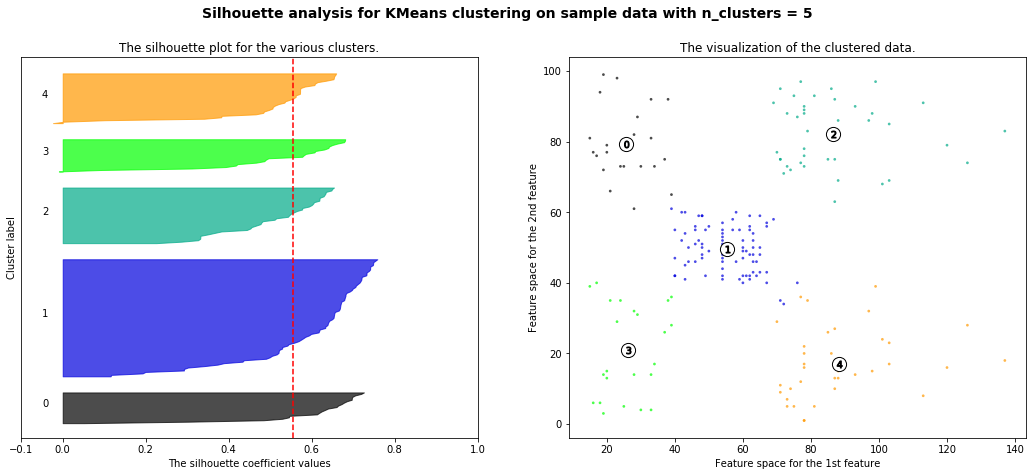

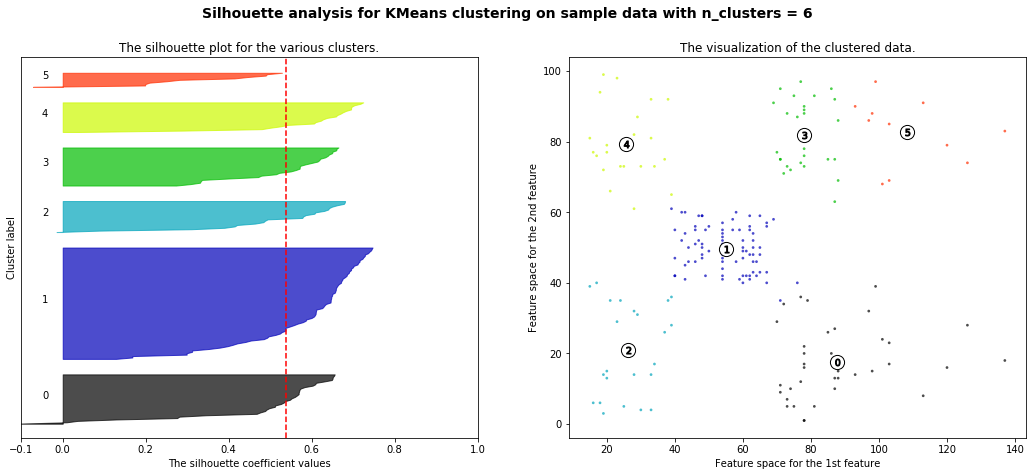

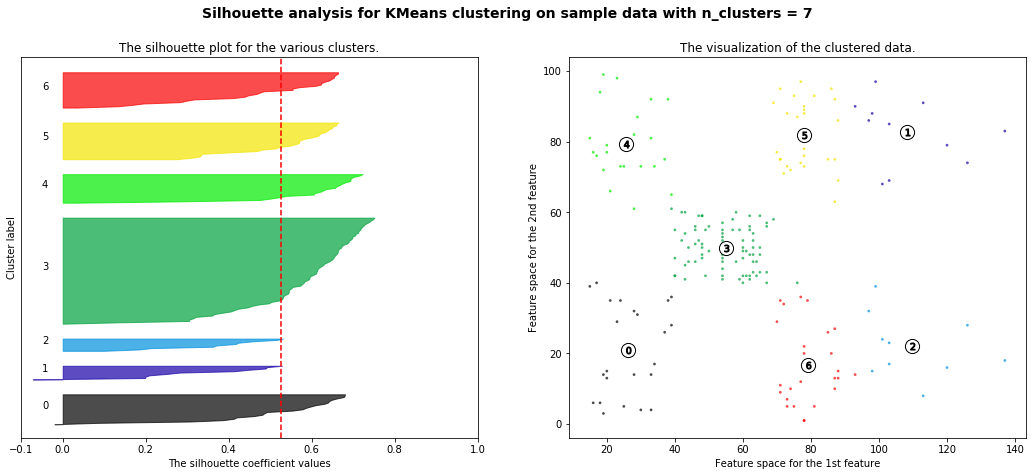

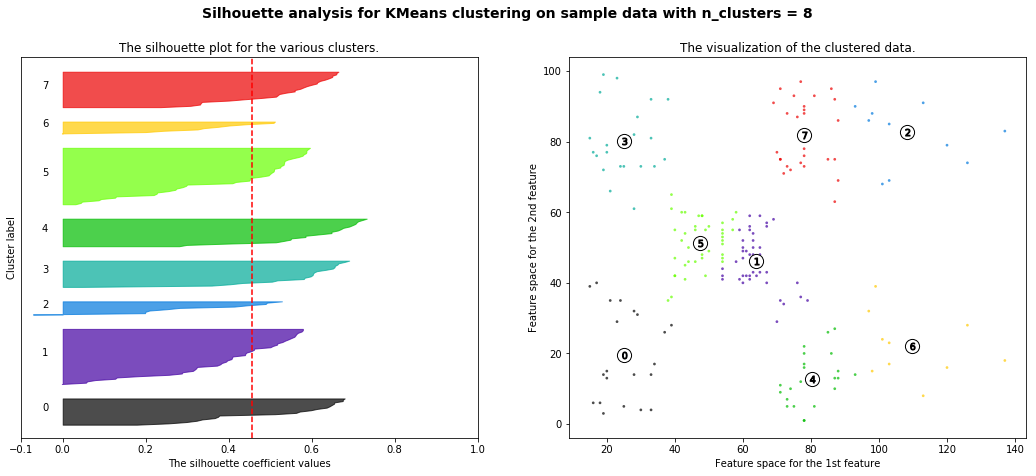

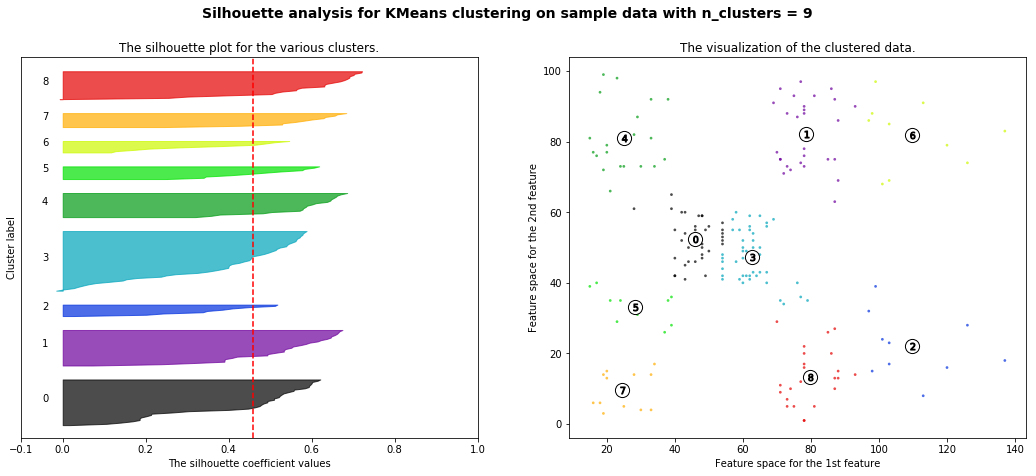

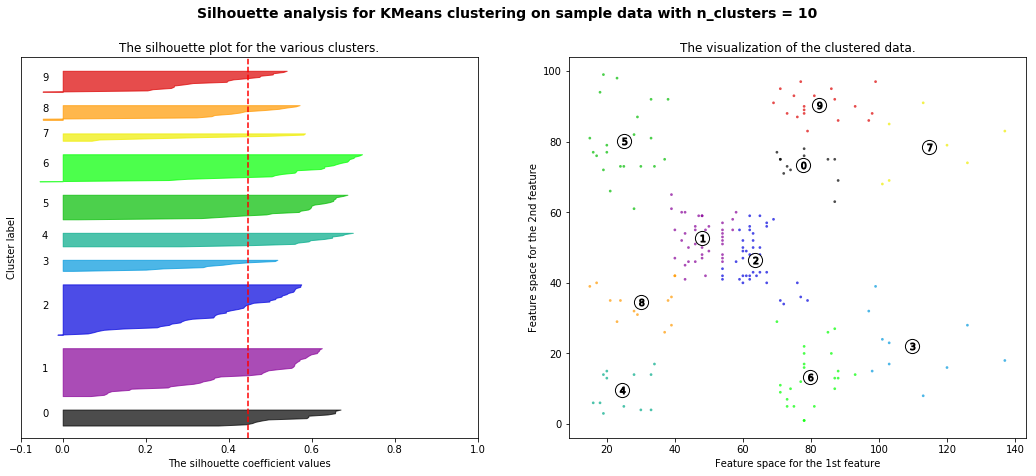

In [39]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper        = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

__Left pic__:  

depicts a sorted list of SA cluster of each point in a given cluster. The black region is the plot of S score for examples belonging to cluster 0, whereas green plot is the S score for examples belonging to cluster 1.

The red doted line is the mean S. score for the cluster in consideration. The value is roughly around 0.5

For this to be a good value for number of cluster, one should consider the following points

    - Firstly, The mean value should be as close to 1 as possible
    - Secondly, The plot of each cluster should be above the mean value as much as possible. Any plot region below the mean value is not desirable.   
    - Lastly, the width of the plot should be as uniform as possible.
    
Right pic is the visualization of the cluster assignment.
